L'objectif de ce projet est d'analyser quels types de personnes étaient susceptibles de survivre à la tragédie du Titanic en utilisant la régression logistique. La sortie serait 0 (pas de survie) ou 1 (survie)

### Importer les bibliothèques

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importer l'ensemble de données

In [60]:
#assurez-vous de changer le chemin des fichiers
training_set=pd.read_csv("../../data/titanic/train.csv")
print(training_set.shape)
training_set.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [61]:
print(training_set.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Pclass: Classe de billet 

SibSp: nombre de frères et sœurs ou de conjoints

Parch: nombre de parents ou d'enfants

Ticket: Numéro de ticket (nous n'utiliserons pas cette fonctionnalité)

Fare: Tarif passager (USD)

Cabin: Numéro de cabine

Embarked: Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)

In [62]:
#afficher les 10 dernières lignes
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Explorer l'ensemble de données

In [10]:
print("# d'échantillons = ", len(training_set))

# d'échantillons =  891


In [11]:
print("# de passagers ayant survécu = ", len(training_set[training_set["Survived"]==1]))

# de passagers ayant survécu =  342


In [12]:
print("# de passagers qui n'ont pas survécu = ", len(training_set[training_set["Survived"]==0]))

# de passagers qui n'ont pas survécu =  549


In [14]:
print("% survécu = ", 1. * len(training_set[training_set["Survived"]==1])/len(training_set) * 100)
print("% non survécu = ", 1. * len(training_set[training_set["Survived"]==0])/len(training_set) * 100)

% survécu =  38.38383838383838
% non survécu =  61.61616161616161


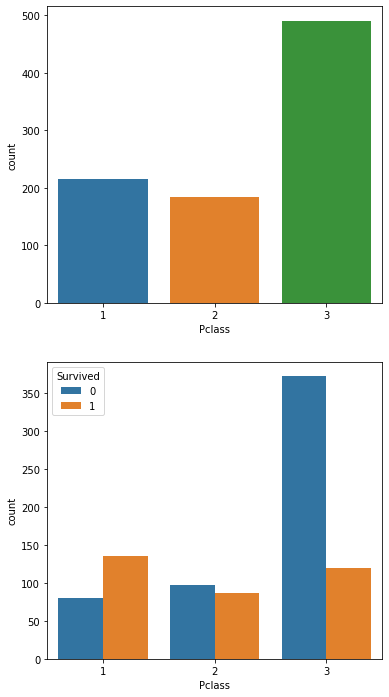

In [17]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Pclass', data=training_set)
plt.subplot(212)
sns.countplot(x='Pclass',hue='Survived', data=training_set)

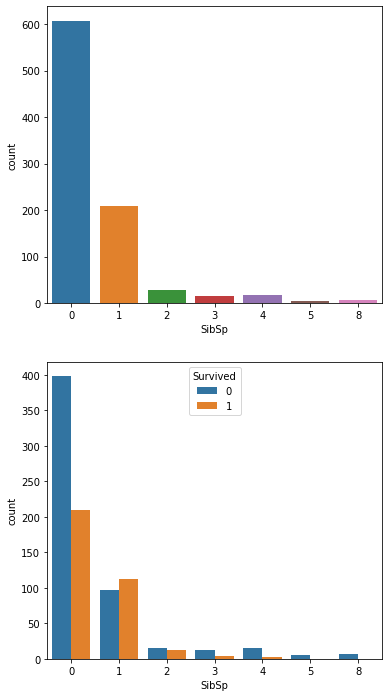

In [18]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='SibSp', data=training_set)
plt.subplot(212)
sns.countplot(x='SibSp',hue='Survived', data=training_set)

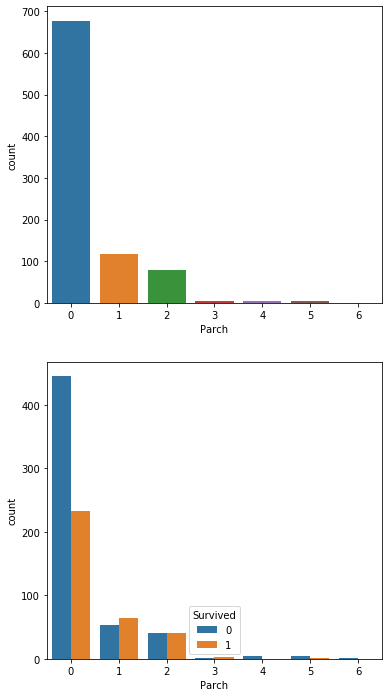

In [19]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Parch', data=training_set)
plt.subplot(212)
sns.countplot(x='Parch',hue='Survived', data=training_set)

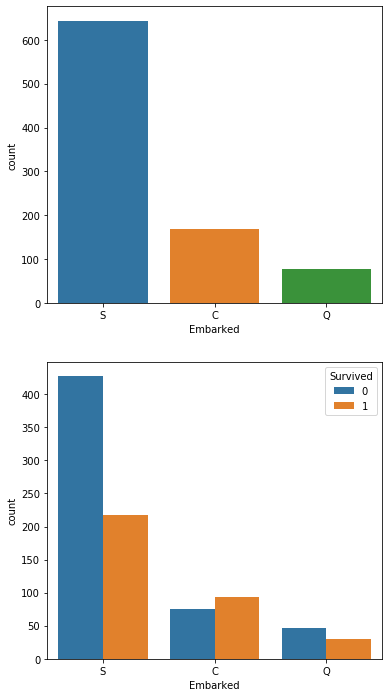

In [20]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Embarked', data=training_set)
plt.subplot(212)
sns.countplot(x='Embarked',hue='Survived', data=training_set)

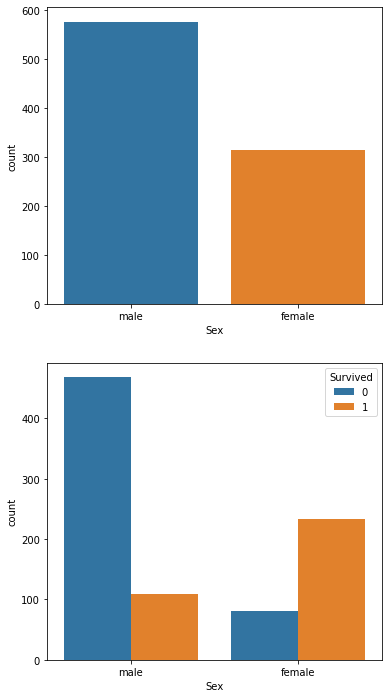

In [21]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x='Sex', data=training_set)
plt.subplot(212)
sns.countplot(x='Sex',hue='Survived', data=training_set)

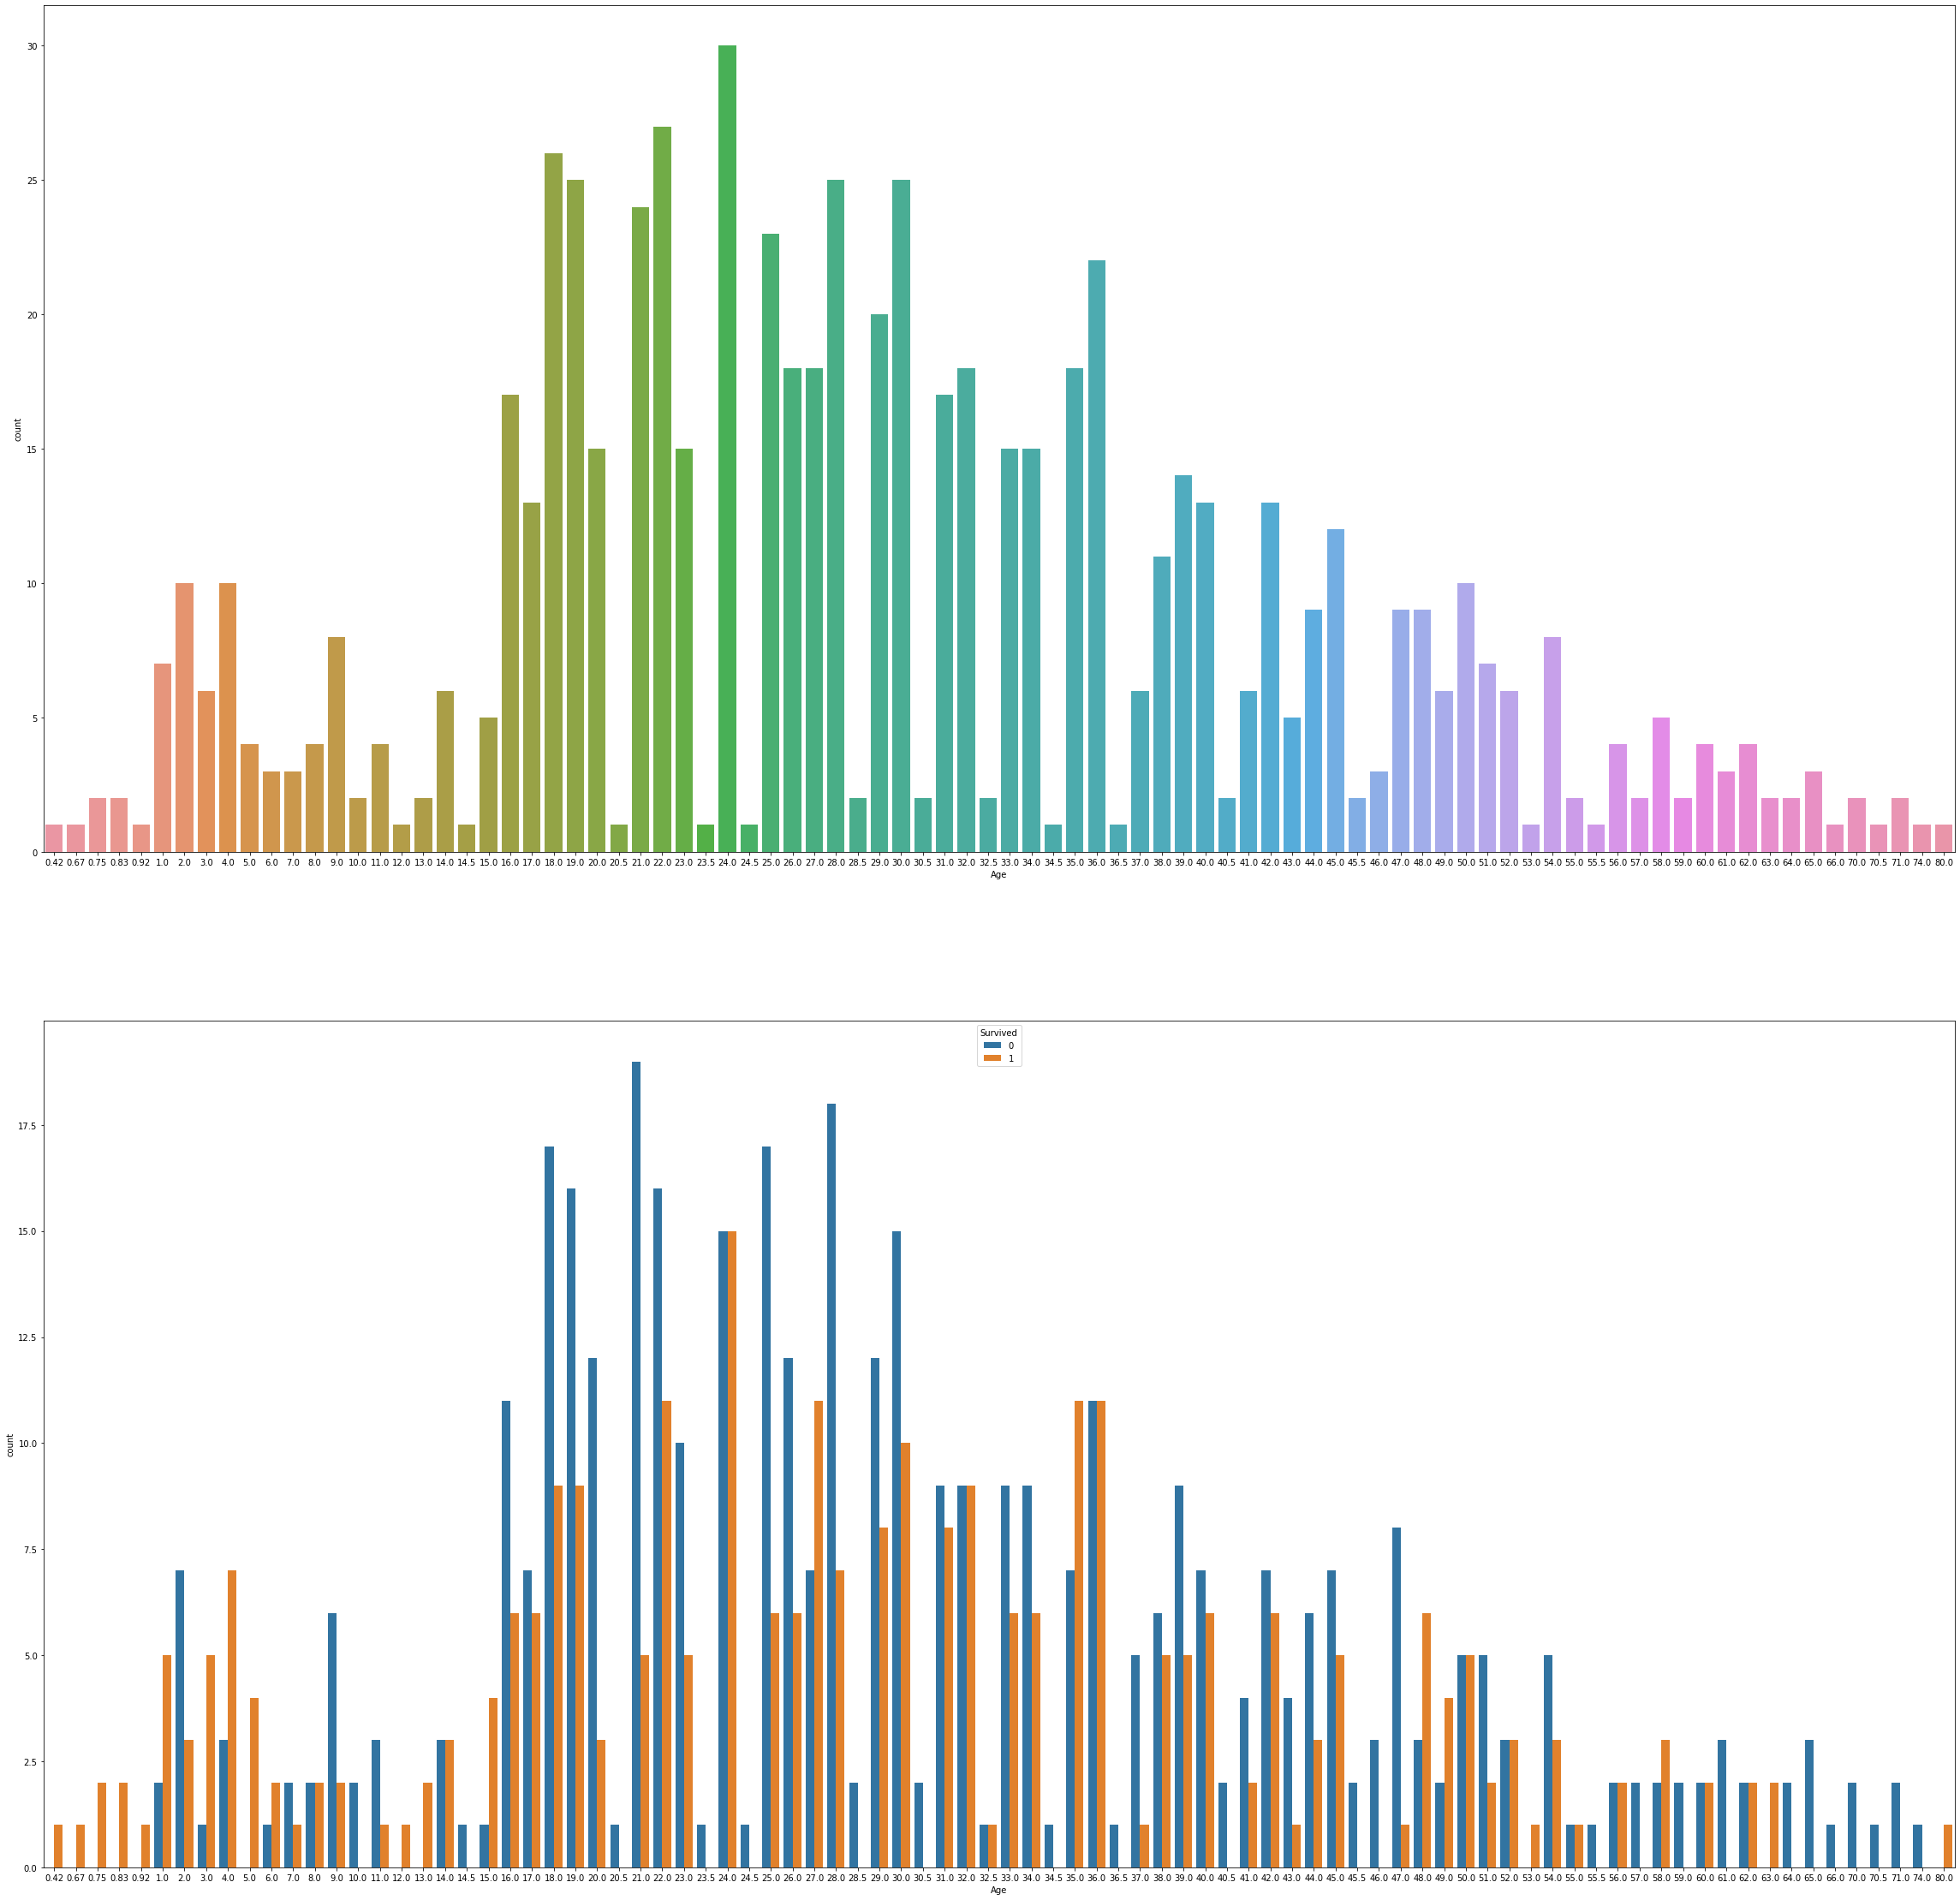

In [23]:
plt.figure(figsize = [40,40])
plt.subplot(211)
sns.countplot(x='Age', data=training_set)
plt.subplot(212)
sns.countplot(x='Age',hue='Survived', data=training_set)

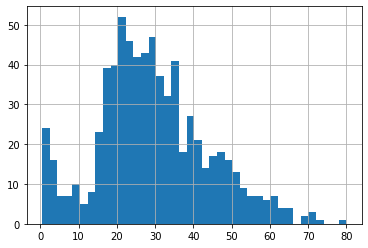

In [24]:
training_set["Age"].hist(bins = 40)

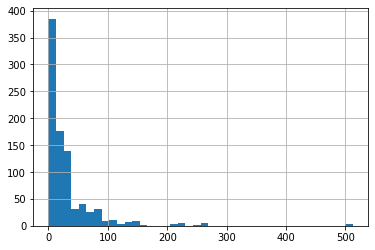

In [26]:
training_set["Fare"].hist(bins = 40)

### Préparation des données / nettoyage des données

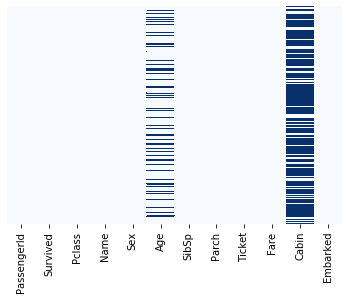

In [27]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

Nous pouvons voir que les fonctionnalités age et cabine contiennent des valeurs nulles. Nous pouvons supprimer la colonne Cabine car elle n'aidera pas trop et il est difficile de remplacer les valeurs manquantes

In [28]:
training_set.drop('Cabin',axis=1,inplace=True)

In [29]:
training_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


Nous supprimons les colonnes qui ne nous aideront pas dans la prédiction, telles que le nom, l'identifiant, le numéro de ticket et le port d'embarquement

In [30]:
training_set.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [31]:
training_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


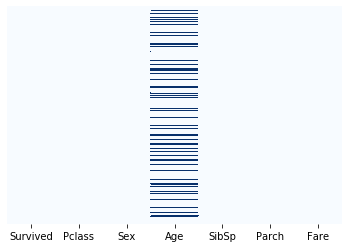

In [32]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

Nous devons faire face à l'âge et remplacer les valeurs manquantes

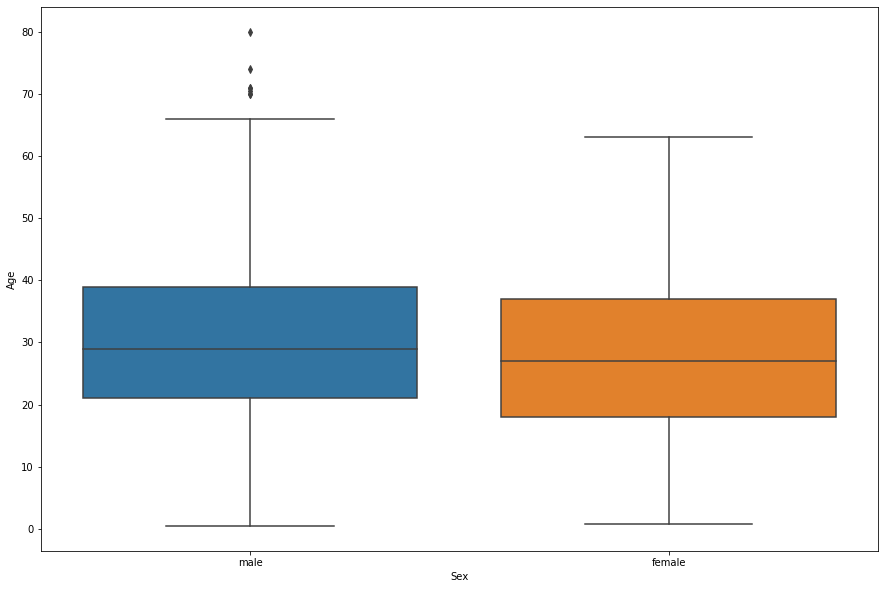

In [33]:
plt.figure(figsize= (15,10))
sns.boxplot(x='Sex',y='Age',data=training_set)

Nous remplacerons les âges manquants en fonction du sexe et de l'âge moyen de chaque sexe.

In [34]:
def Fill_Age(data):
    age=data[0]
    sex=data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

In [35]:
training_set['Age']=training_set[['Age','Sex']].apply(Fill_Age,axis=1)

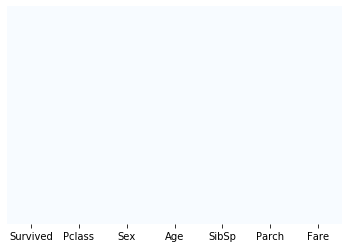

In [36]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

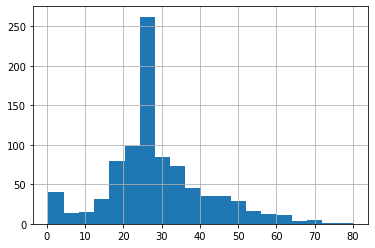

In [38]:
training_set['Age'].hist(bins=20)

In [39]:
training_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,25.0,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [41]:
male=pd.get_dummies(training_set["Sex"],drop_first=True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [42]:
training_set.drop(["Sex"],axis=1,inplace=True)

In [43]:
training_set.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [44]:
training_set = pd.concat([training_set,male], axis = 1)

In [45]:
training_set.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [46]:
X=training_set.drop('Survived',axis=1).values
y=training_set['Survived'].values

In [47]:
print(X.shape)
print(y.shape)

(891, 6)
(891,)


### Former le modèle

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Évaluer le modèle

In [50]:
y_predict=classifier.predict(X_test)

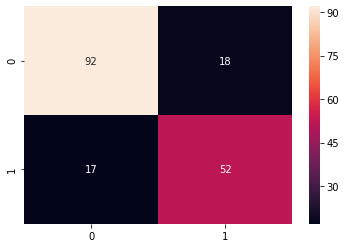

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

